In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
sns.set_theme()

In [2]:
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep=';')
df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Île-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On constate que des les premières lignes nous avons des NaN, même sur notre variable cible 'consommation'

In [3]:
print(df.shape)

(1927296, 32)


Notre dataframe contient 32 variables et 1 927 296 entrées

In [4]:
print(df.dtypes.value_counts())

float64    26
object      5
int64       1
dtype: int64


Notre dataframe contient 5 variables de type catégorielle et 27 de type numérique

In [5]:
df.columns

Index(['Code INSEE région', 'Région', 'Nature', 'Date', 'Heure',
       'Date - Heure', 'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'Stockage batterie',
       'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore',
       'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)',
       'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)',
       'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)',
       'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
       'Column 30'],
      dtype='object')

- **Ech. physiques (MW)** : somme des envois ou des réceptions en MW entre régions
- **TCO <filière> %** : Taux de couverture de <filière> en % (production<filière> / production totale)
- **TCH <filière> %** : Taux de charge de <filière> en % (volume de prod / capacité de prod max en service)
- **Pompage (MW)**: correspond aux STEP

STEP (stations de transfert d’énergie par pompage ) : Grâce à leur fonction de stockage, ces installations contribuent à maintenir l’équilibre entre production et consommation sur le réseau électrique, tout en limitant les coûts de production lors des pics de consommation. A l’heure actuelle, le transfert d’énergie par pompage hydraulique est la technique la plus mature de stockage stationnaire de l’énergie.

Il faudrait normalisé le nom des colonnes pour être plus facilement utilisable

In [6]:
df = df.set_axis(['code_insee_region', 'region', 'nature', 'date', 'heure', 'date_heure',
       'consommation_mw', 'thermique_mw', 'nucleaire_mw', 'eolien_mw',
       'solaire_mw', 'hydraulique_mw', 'pompage_mw', 'bioenergies_mw',
       'ech._physiques_mw','stockage_batterie','destockage_batterie','eolien_terrestre',
       'eolien_offshore', 'tco_thermique_%', 'tch_thermique_%',
       'tco_nucleaire_%', 'tch_nucleaire_%', 'tco_eolien_%', 'tch_eolien_%',
       'tco_solaire_%', 'tch_solaire_%', 'tco_hydraulique_%',
       'tch_hydraulique_%', 'tco_bioenergies_%', 'tch_bioenergies_%', 'column_30'],
        axis='columns', inplace=False)

df.columns

Index(['code_insee_region', 'region', 'nature', 'date', 'heure', 'date_heure',
       'consommation_mw', 'thermique_mw', 'nucleaire_mw', 'eolien_mw',
       'solaire_mw', 'hydraulique_mw', 'pompage_mw', 'bioenergies_mw',
       'ech._physiques_mw', 'stockage_batterie', 'destockage_batterie',
       'eolien_terrestre', 'eolien_offshore', 'tco_thermique_%',
       'tch_thermique_%', 'tco_nucleaire_%', 'tch_nucleaire_%', 'tco_eolien_%',
       'tch_eolien_%', 'tco_solaire_%', 'tch_solaire_%', 'tco_hydraulique_%',
       'tch_hydraulique_%', 'tco_bioenergies_%', 'tch_bioenergies_%',
       'column_30'],
      dtype='object')

In [7]:
df.isna()

,code_insee_region,region,nature,date,heure,date_heure,consommation_mw,thermique_mw,nucleaire_mw,eolien_mw,solaire_mw,hydraulique_mw,pompage_mw,bioenergies_mw,ech._physiques_mw,stockage_batterie,destockage_batterie,eolien_terrestre,eolien_offshore,tco_thermique_%,tch_thermique_%,tco_nucleaire_%,tch_nucleaire_%,tco_eolien_%,tch_eolien_%,tco_solaire_%,tch_solaire_%,tco_hydraulique_%,tch_hydraulique_%,tco_bioenergies_%,tch_bioenergies_%,column_30
0,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1927292,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True
1927293,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True
1927294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True


#### On veut savoir le nombre de NaN par colonne

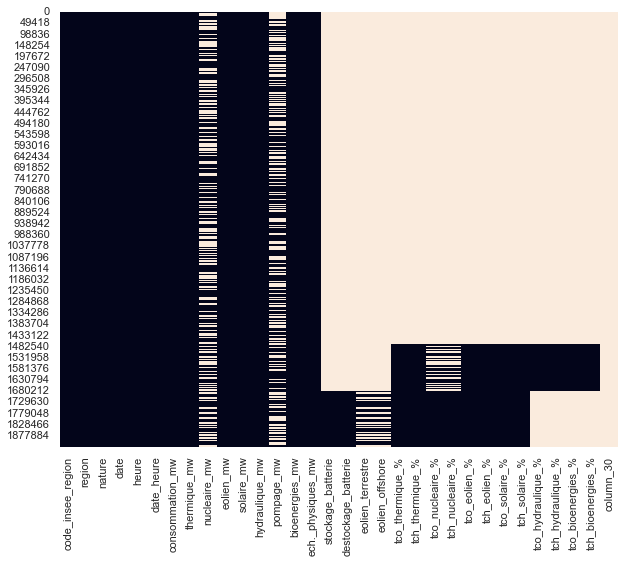

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna(), cbar=False);

La partie blanche de cet heatmap représente les valeurs manquantes (NaN).
On observe donc que nous avons beaucoup de valeurs manquantes sur certaines colonnes.

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

column_30              1.000000
eolien_offshore        0.926081
eolien_terrestre       0.926081
tch_bioenergies_%      0.890616
tco_bioenergies_%      0.890616
tch_hydraulique_%      0.890616
tco_hydraulique_%      0.890616
stockage_batterie      0.873282
destockage_batterie    0.873282
tch_nucleaire_%        0.809474
tco_nucleaire_%        0.809474
tch_thermique_%        0.763897
tco_thermique_%        0.763897
tch_solaire_%          0.763897
tco_solaire_%          0.763897
tch_eolien_%           0.763897
tco_eolien_%           0.763897
pompage_mw             0.434851
nucleaire_mw           0.416670
eolien_mw              0.000056
solaire_mw             0.000006
consommation_mw        0.000006
thermique_mw           0.000006
ech._physiques_mw      0.000006
bioenergies_mw         0.000006
hydraulique_mw         0.000006
region                 0.000000
date_heure             0.000000
heure                  0.000000
date                   0.000000
nature                 0.000000
code_ins

Ici nous avons le pourcentage de NaN par colonne.

# Nettoyons les données

Je fais le choix de supprimer les colonnes ayant plus de 75% de NaN pour avoir un dataframe propre. De plus, nous n'avons pas de données dans les colonnes TCO et TCH entre 2013 et 2019.

In [10]:
df_clean = df.iloc[:,0:15]
(df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending=False)

pompage_mw           0.434851
nucleaire_mw         0.416670
eolien_mw            0.000056
consommation_mw      0.000006
thermique_mw         0.000006
solaire_mw           0.000006
hydraulique_mw       0.000006
bioenergies_mw       0.000006
ech._physiques_mw    0.000006
code_insee_region    0.000000
region               0.000000
nature               0.000000
date                 0.000000
heure                0.000000
date_heure           0.000000
dtype: float64

Nous avons des colonnes où il y a moins de 0,0056% de NaN. Pourquoi ? Voyons à quelle date.

In [11]:
print(df_clean[df_clean['bioenergies_mw'].isna()]['date'].value_counts())
print(df_clean[df_clean['hydraulique_mw'].isna()]['date'].value_counts())
print(df_clean[df_clean['solaire_mw'].isna()]['date'].value_counts())
print(df_clean[df_clean['thermique_mw'].isna()]['date'].value_counts())
print(df_clean[df_clean['eolien_mw'].isna()]['date'].value_counts())

2013-01-01    12
Name: date, dtype: int64
2013-01-01    12
Name: date, dtype: int64
2013-01-01    12
Name: date, dtype: int64
2013-01-01    12
Name: date, dtype: int64
2013-05-08    47
2013-12-27    47
2013-01-01    12
2013-05-09     1
2013-12-28     1
Name: date, dtype: int64


On observe donc que les douzes premières lignes de notre dataframe ont des NaN. Nous pouvons donc supprimer ces lignes. Pour l'éolien c'est trop disparate, nous verrons plus tard ce que nous ferons.

In [12]:
df_clean = df_clean.drop(axis=0, labels=[0,1,2,3,4,5,6,7,8,9,10,11])

In [13]:
df_clean.reset_index(inplace=True, drop=True)
(df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending=False)

pompage_mw           0.434848
nucleaire_mw         0.416667
eolien_mw            0.000050
code_insee_region    0.000000
region               0.000000
nature               0.000000
date                 0.000000
heure                0.000000
date_heure           0.000000
consommation_mw      0.000000
thermique_mw         0.000000
solaire_mw           0.000000
hydraulique_mw       0.000000
bioenergies_mw       0.000000
ech._physiques_mw    0.000000
dtype: float64

# Pour les NaN restants, que devons nous faire :
**nucleaire_mw**: on suppose que ce sont les régions où il n'y en a pas

**pompage_mw**: idem à la colonne nucléaire

**eolien_mw**: idem au deux autres.

On va donc remplacer les NaN par zéro

In [14]:
df_clean['nucleaire_mw'] = df_clean['nucleaire_mw'].fillna(0)
df_clean['pompage_mw'] = df_clean['pompage_mw'].fillna(0)
df_clean['eolien_mw'] = df_clean['eolien_mw'].fillna(0)

In [15]:
(df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending=False)

code_insee_region    0.0
region               0.0
nature               0.0
date                 0.0
heure                0.0
date_heure           0.0
consommation_mw      0.0
thermique_mw         0.0
nucleaire_mw         0.0
eolien_mw            0.0
solaire_mw           0.0
hydraulique_mw       0.0
pompage_mw           0.0
bioenergies_mw       0.0
ech._physiques_mw    0.0
dtype: float64

### Nous n'avons donc plus de valeurs manquantes dans notre dataframe

In [16]:
df_clean.sample()

,code_insee_region,region,nature,date,heure,date_heure,consommation_mw,thermique_mw,nucleaire_mw,eolien_mw,solaire_mw,hydraulique_mw,pompage_mw,bioenergies_mw,ech._physiques_mw
1754832,28,Normandie,Données consolidées,2021-05-05,14:30,2021-05-05T14:30:00+02:00,3100.0,211.0,6917.0,506.0,114.0,8.0,0.0,82.0,-4738.0


Pour pouvoir travailler correctement sur notre problématique, nous allons créé deux nouvelles colonnes qui seront :

**production totale**

**production énergies renouvelables**

In [17]:
df_clean['total_prod'] = (df_clean['thermique_mw']
                         + df_clean['nucleaire_mw']
                         + df_clean['eolien_mw']
                         + df_clean['solaire_mw']
                         + df_clean['hydraulique_mw']
                         + df_clean['bioenergies_mw'])

df_clean['prod_energie_green'] = (df_clean['thermique_mw']
                               + df_clean['eolien_mw']
                               + df_clean['solaire_mw']
                               + df_clean['hydraulique_mw']
                               + df_clean['bioenergies_mw'])

df_clean.sample()

,code_insee_region,region,nature,date,heure,date_heure,consommation_mw,thermique_mw,nucleaire_mw,eolien_mw,solaire_mw,hydraulique_mw,pompage_mw,bioenergies_mw,ech._physiques_mw,total_prod,prod_energie_green
1228753,24,Centre-Val de Loire,Données définitives,2018-11-04,06:30,2018-11-04T06:30:00+01:00,2169.0,84.0,6973.0,56.0,0.0,0.0,0.0,64.0,-5006.0,7177.0,204.0


Transformons maintenant les colonnes 'date' en to_datetime

In [18]:
df_clean['date'] =  pd.to_datetime(df_clean['date'])
df_clean['heure'] =  pd.to_datetime(df_clean['heure'])
df_clean['date_heure'] =  pd.to_datetime(df_clean['date_heure'], utc=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927284 entries, 0 to 1927283
Data columns (total 17 columns):
 #   Column              Dtype              
---  ------              -----              
 0   code_insee_region   int64              
 1   region              object             
 2   nature              object             
 3   date                datetime64[ns]     
 4   heure               datetime64[ns]     
 5   date_heure          datetime64[ns, UTC]
 6   consommation_mw     float64            
 7   thermique_mw        float64            
 8   nucleaire_mw        float64            
 9   eolien_mw           float64            
 10  solaire_mw          float64            
 11  hydraulique_mw      float64            
 12  pompage_mw          float64            
 13  bioenergies_mw      float64            
 14  ech._physiques_mw   float64            
 15  total_prod          float64            
 16  prod_energie_green  float64            
dtypes: datetime64[ns, UTC](1), 

### Nous allons maintenant faire en sorte de pouvoir travailler par jour, mois et année

In [19]:
df_clean['jour'] = df_clean['date'].apply(lambda x : x.day)
df_clean['mois'] = df_clean['date'].apply(lambda x : x.month)
df_clean['annee'] = df_clean['date'].apply(lambda x : x.year)

df_clean.head()

,code_insee_region,region,nature,date,heure,date_heure,consommation_mw,thermique_mw,nucleaire_mw,eolien_mw,solaire_mw,hydraulique_mw,pompage_mw,bioenergies_mw,ech._physiques_mw,total_prod,prod_energie_green,jour,mois,annee
0,24,Centre-Val de Loire,Données définitives,2013-01-01,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,2476.0,90.0,9085.0,508.0,0.0,34.0,0.0,25.0,-7267.0,9742.0,657.0,1,1,2013
1,44,Grand Est,Données définitives,2013-01-01,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0,12040.0,2903.0,1,1,2013
2,11,Île-de-France,Données définitives,2013-01-01,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,9134.0,685.0,0.0,16.0,0.0,0.0,0.0,142.0,8289.0,843.0,843.0,1,1,2013
3,52,Pays de la Loire,Données définitives,2013-01-01,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,3595.0,127.0,0.0,182.0,0.0,0.0,0.0,32.0,3252.0,341.0,341.0,1,1,2013
4,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,5570.0,537.0,0.0,12.0,0.0,1412.0,0.0,58.0,3548.0,2019.0,2019.0,1,1,2013


Sachant que nous n'avons pas une année pleine en 2022, nous allons donc la suprimmer.

In [20]:
df_clean = df_clean.loc[df_clean['annee'] != 2022]

In [21]:
df_clean.to_csv('df_clean.csv', index=False)